# **🎮 프로젝트: 게임 데이터 분석**
- **Part 0. Introduction**  
- **Part 1. Import Data**  
- **Part 2. EDA**  
- **Part 3. Analytics & Visualization**
- **Part 4. Business Insight & Conclusion**  

# **Part 0. Introduction**

<img width='500' src='https://cdn.cloudflare.steamstatic.com/steam/apps/239820/ss_3ecc65538ac4170f1855f089377baaa8001e5d68.1920x1080.jpg?t=1605506865'>

##**기획 배경**
게임 회사의 데이터 팀에 합류했습니다.

**다음 분기에 어떤 게임을 설계해야 할까**라는 고민을 해결하기 위해, 기존의 데이터에 기반하여 인사이트를 얻고, 의사결정을 하고자 하는 것이 목표입니다.

## **Data Description**
- Name : 게임의 이름
- Platform : 게임이 지원되는 플랫폼의 이름
- Year : 게임이 출시된 연도
- Genre : 게임의 장르
- Publisher : 게임을 배급한 회사
- NA_Sales : 북미지역에서의 출고량
- EU_Sales : 유럽지역에서의 출고량
- JP_Sales : 일본지역에서의 출고량
- Other_Sales : 기타지역에서의 출고량

# **Part 1. Import Data**

In [ ]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 데이터 업로드
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


In [ ]:
# .read_csv() 활용하여 데이터 읽어오기
game_data = pd.read_csv('vgames2.csv')
game_data.drop('Unnamed: 0', axis = 1, inplace = True)
game_data.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


# **Part 2. EDA**  

In [ ]:
df = game_data.copy()
df.shape

(16598, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [ ]:
# 데이터셋의 중복된 데이터 개수 확인
df.duplicated().sum()

1

In [ ]:
# 중복 데이터 확인
df[df.duplicated(keep=False)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
8055,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0
9184,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0


In [ ]:
# drop_duplicates()를 통해 중복된 데이터 제거
df = df.drop_duplicates().reset_index(drop=True)
df.shape

(16597, 9)

In [ ]:
# 결측치 확인
df.isnull().sum()

Name             0
Platform         0
Year           270
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
# 이름이 중복된 데이터 확인
df[df.duplicated('Name')].sort_values('Name')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
9464,007: Quantum of Solace,DS,2008.0,Action,Activision,0.11,0.01,0,0.01
16279,007: Quantum of Solace,X360,2008.0,Action,Activision,0.82,0.52,0.01,0.14
6839,007: Quantum of Solace,PS3,2008.0,Action,Activision,0.43,0.52,0.02,0.2
5504,007: Quantum of Solace,Wii,2008.0,Action,Activision,0.3,0.29,0.01M,0.07
8867,007: Quantum of Solace,PC,2008.0,Action,Activision,0.01,0.01,0,0
...,...,...,...,...,...,...,...,...,...
16250,pro evolution soccer 2011,PS2,2010.0,Sports,Konami Digital Entertainment,0.04,0.21,0.05,0.11
13756,pro evolution soccer 2011,Wii,2010.0,Sports,Konami Digital Entertainment,0.08,0.1,0.03,0.02
5796,pro evolution soccer 2011,PS3,2010.0,Sports,Konami Digital Entertainment,0.29,1.18,0.54,0.41
5297,pro evolution soccer 2011,PC,2010.0,Sports,Konami Digital Entertainment,0,0.05,0,0.01


In [ ]:
# Year 결측치 확인
df[df['Name']=='Madden NFL 06']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1973,Madden NFL 06,PSP,2005.0,Sports,Electronic Arts,0.69,0,0,0.06
2137,Madden NFL 06,GBA,2005.0,Sports,Electronic Arts,0.17,0.06,0,0
2142,Madden NFL 06,X360,NaN,Sports,Electronic Arts,0.54,0,0.01,0.03
4315,Madden NFL 06,XB,2005.0,Sports,Electronic Arts,1.75,0.03,0,0.08
5189,Madden NFL 06,PS2,2005.0,Sports,Electronic Arts,3.98,0.26,0.01,0.66
12598,Madden NFL 06,GC,2005.0,Sports,Electronic Arts,0.44,0.11,0,0.02
12837,Madden NFL 06,DS,2005.0,Sports,Electronic Arts,0.11,0,0,0.01


In [ ]:
# Year 결측치 채워주기
df = df.sort_values(['Name', 'Year'])
df['Year'] = df.groupby('Name')['Year'].ffill() # ffill(): forward fill, 앞으로 전파

In [ ]:
# Genre 결측치 확인
df[df['Name']=='Apache: Air Assault']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
3846,Apache: Air Assault,PS3,2010.0,Simulation,Activision,0.11,0.07,0,0.03
11355,Apache: Air Assault,X360,2010.0,Simulation,Activision,0.12,0.04,0,0.01
16554,Apache: Air Assault,PC,2010.0,NaN,Just Flight,0,0.03,0,0.01


In [ ]:
# Genre 결측치 채워주기
df = df.sort_values(['Name', 'Genre'])
df['Genre'] = df.groupby('Name')['Genre'].ffill()

In [ ]:
# Publisher 결측치 확인
df[df['Name']=='Bound By Flame']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1118,Bound By Flame,PS4,2014.0,Role-Playing,Focus Home Interactive,0.07,0.08,0,0.04
16066,Bound By Flame,X360,2014.0,Role-Playing,NaN,0,0.01,0,0


In [ ]:
# Publisher 결측치 채워주기
df = df.sort_values(['Name', 'Publisher'])
df['Publisher'] = df.groupby('Name')['Publisher'].ffill()

In [ ]:
# 결측치 수 재확인
df.isnull().sum()

Name             0
Platform         0
Year           146
Genre           30
Publisher       51
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
# Sales 열 확인
df[df['NA_Sales'].str.contains(r'[^0-9.]')]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10652,Ace Combat X: Skies of Deception,PSP,2006.0,Simulation,Namco Bandai Games,0.37M,0.31,0.12,0.19
6086,Adventures of Lolo,NES,1989.0,Puzzle,HAL Laboratory,60K,0,0,0
8954,Alien: Isolation,XOne,2014.0,Shooter,Sega,0.22M,0.24,0,0.04
14346,Animal Planet: Vet Life,Wii,2009.0,Simulation,Activision,90K,0,0,0.01
12697,Archer Maclean Presents: Pool Paradise,GC,2004.0,Sports,Ignition Entertainment,0.02M,0.01,0,0
...,...,...,...,...,...,...,...,...,...
11123,Yarudora Series Vol.1: Double Cast,PS,1998.0,Adventure,Sony Computer Entertainment,0M,0,0.35,0.02
9455,You Don't Know Jack: Mock 2,PS,2000.0,Misc,Vivendi Games,60K,0.04,0,0.01
11721,Yuki Yuna is a Hero: Memory of the Forest,PSV,2015.0,Action,FuRyu,0M,0,0.04,0
2158,Yuusha no Kuse ni Namaikida Or 3D,PSP,2010.0,Strategy,Sony Computer Entertainment,0M,0,0.11,0


In [ ]:
# Sales 열 정제
def sales_to_float(sales):
    if sales.endswith('K'):
        return float(sales[:-1]) * 0.001
    elif sales.endswith('M'):
        return float(sales[:-1])
    else:
        return float(sales)

df['NA_Sales'] = df['NA_Sales'].apply(sales_to_float)
df['EU_Sales'] = df['EU_Sales'].apply(sales_to_float)
df['JP_Sales'] = df['JP_Sales'].apply(sales_to_float)
df['Other_Sales'] = df['Other_Sales'].apply(sales_to_float)

In [ ]:
# Feature Engineering
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df['Total_Sales'].describe().reset_index()

,index,Total_Sales
0,count,16597.000000
1,mean,0.537195
2,std,1.555192
3,min,0.000000
4,25%,0.060000
5,50%,0.170000
6,75%,0.470000
7,max,82.740000


In [ ]:
df['Total_Sales'].quantile(0.9)

1.21

In [ ]:
no_year_top = df[(df['Year'].isnull()) & (df['Total_Sales']>=1)]
no_year_top

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
5720,Adventure,2600,NaN,Adventure,Atari,1.21,0.08,0.0,0.01,1.30
14764,Combat,2600,NaN,Action,Atari,1.17,0.07,0.0,0.01,1.25
3031,Donkey Kong Land III,GB,NaN,Platform,Nintendo,0.68,0.31,0.0,0.04,1.03
13326,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,Konami Digital Entertainment,2.15,0.18,0.0,0.07,2.40
3942,Legacy of Kain: Soul Reaver,PS,NaN,Action,Eidos Interactive,0.58,0.40,0.0,0.07,1.05
31,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0.0,0.21,2.48
10775,Rock Band,PS3,NaN,Misc,Electronic Arts,0.99,0.41,0.0,0.22,1.62
12857,Rock Band,PS2,NaN,Misc,Electronic Arts,0.71,0.06,0.0,0.35,1.12
4181,Rock Band,Wii,NaN,Misc,MTV Games,1.35,0.56,0.0,0.20,2.11
11308,Triple Play 99,PS,NaN,Sports,NaN,0.81,0.55,0.0,0.10,1.46


In [ ]:
year_list = [1980,1977,1997,2001,1999,2007,2007,2007,2008,1998,2005]

for idx, year in zip(no_year_top.index, year_list):
  df.loc[idx,'Year'] = year

In [ ]:
df.loc[11308, 'Publisher'] = 'Electronic Arts'
df.loc[3562, 'Publisher'] = 'THQ'

In [ ]:
no_gen_top = df[(df['Genre'].isnull()) & (df['Total_Sales']>=1)]
no_gen_top

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
15525,Bloodborne,PS4,2015.0,NaN,Sony Computer Entertainment,1.00,0.76,0.26,0.36,2.38
5668,Chrono Cross,PS,1999.0,NaN,SquareSoft,0.62,0.42,0.69,0.12,1.85
11495,F-Zero X,N64,1998.0,NaN,Nintendo,0.45,0.33,0.29,0.03,1.10
9487,Final Fantasy XII,PS2,2006.0,NaN,Square Enix,1.88,0.00,2.33,1.74,5.95
12330,Onimusha: Warlords,PS2,2001.0,NaN,Virgin Interactive,0.99,0.48,1.09,0.14,2.70
1971,Pokemon X/Pokemon Y,3DS,2013.0,NaN,Nintendo,5.17,4.05,4.34,0.79,14.35
4598,Wii Party,Wii,2010.0,NaN,Nintendo,1.79,3.53,2.49,0.68,8.49
11062,Yakuza 3,PS3,2009.0,NaN,Sega,0.21,0.21,0.62,0.08,1.12


In [ ]:
df['Genre'].unique()

array(['Sports', 'Role-Playing', 'Action', 'Racing', 'Shooter', 'Misc',
       'Adventure', 'Puzzle', 'Simulation', 'Platform', 'Strategy',
       'Fighting', nan], dtype=object)

In [ ]:
genre_list = ['Action','Role-Playing','Racing','Role-Playing','Action','Role-Playing','Misc','Action']

for idx, genre in zip(no_gen_top.index, genre_list):
  df.loc[idx,'Genre'] = genre

In [ ]:
df.isnull().sum()

Name             0
Platform         0
Year           135
Genre           22
Publisher       49
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Total_Sales      0
dtype: int64

In [ ]:
# 중복 테이터 Sales 합치기
df[df.duplicated(['Name','Platform','Year','Genre','Publisher'],keep=False)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
7346,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,2.11,0.23,0.00,0.22,2.56
8717,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,0.00,0.01,0.00,0.00,0.01
15704,Sonic the Hedgehog,PS3,2006.0,Platform,Sega,0.41,0.07,0.04,0.66,1.18
8651,Sonic the Hedgehog,PS3,2006.0,Platform,Sega,0.00,0.48,0.00,0.00,0.48


In [ ]:
df = df.groupby(['Name', 'Platform', 'Year']).agg({'Genre': 'first',
                                                   'Publisher':'first',
                                                   'NA_Sales': 'sum', 
                                                   'EU_Sales': 'sum',
                                                   'JP_Sales': 'sum',
                                                   'Other_Sales': 'sum',
                                                   'Total_Sales': 'sum'}).reset_index()

df[df['Name'] == 'Madden NFL 13']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
7649,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,2.11,0.24,0.0,0.22,2.57
7650,Madden NFL 13,PSV,2012.0,Sports,Electronic Arts,0.30,0.00,0.0,0.03,0.33
7651,Madden NFL 13,Wii,2012.0,Sports,Electronic Arts,0.51,0.00,0.0,0.03,0.54
7652,Madden NFL 13,WiiU,2012.0,Sports,Electronic Arts,0.22,0.00,0.0,0.02,0.24
7653,Madden NFL 13,X360,2012.0,Sports,Electronic Arts,2.53,0.16,0.0,0.17,2.86


In [ ]:
# platform 분류
print(df['Platform'].unique())

['PS' 'PS2' 'PSP' 'PS3' 'DS' 'PC' 'Wii' 'X360' 'N64' '3DS' 'GC' 'XB' 'NES'
 'GBA' 'PSV' 'PS4' 'XOne' 'SNES' '2600' 'WiiU' 'SAT' 'GB' 'NG' 'GEN'
 'PCFX' 'DC' '3DO' 'WS' 'TG16' 'SCD' 'GG']


In [ ]:
company = {'DS': 'Nintendo', '3DS': 'Nintendo', 'Wii': 'Nintendo', 'WiiU': 'Nintendo',
           'GC': 'Nintendo', 'GB': 'Nintendo', 'GBA': 'Nintendo',
           'NES': 'Nintendo', 'SNES': 'Nintendo', 'N64': 'Nintendo',

           'PS': 'Sony', 'PS2': 'Sony', 'PS3': 'Sony', 'PS4': 'Sony',
           'PSP': 'Sony','PSV': 'Sony',

           'XB': 'Microsoft', 'X360': 'Microsoft', 'XOne': 'Microsoft',

           'SAT': 'Sega', 'DC': 'Sega', 'GEN': 'Sega', 'SCD': 'Sega', 'GG': 'Sega',

           'TG16': 'NEC', 'PCFX': 'NEC',

           'PC': 'PC', '2600': 'Atari', 'WS': 'Bandai', 'NG': 'SNK',  '3DO': '3DO'}

In [ ]:
df['Company'] = df['Platform'].map(company).astype('category')

In [ ]:
# 결측치 제거
df = df.dropna().reset_index(drop=True)
df.shape

(16403, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16403 entries, 0 to 16402
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Name         16403 non-null  object  
 1   Platform     16403 non-null  object  
 2   Year         16403 non-null  float64 
 3   Genre        16403 non-null  object  
 4   Publisher    16403 non-null  object  
 5   NA_Sales     16403 non-null  float64 
 6   EU_Sales     16403 non-null  float64 
 7   JP_Sales     16403 non-null  float64 
 8   Other_Sales  16403 non-null  float64 
 9   Total_Sales  16403 non-null  float64 
 10  Company      16403 non-null  category
dtypes: category(1), float64(6), object(4)
memory usage: 1.3+ MB


In [ ]:
df.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
Total_Sales    0
Company        0
dtype: int64

In [ ]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
count,16403.000000,16403.000000,16403.000000,16403.000000,16403.000000,16403.000000
mean,1994.178748,0.266459,0.147943,0.078369,0.048491,0.541261
std,155.497195,0.821194,0.508167,0.310923,0.189605,1.563752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


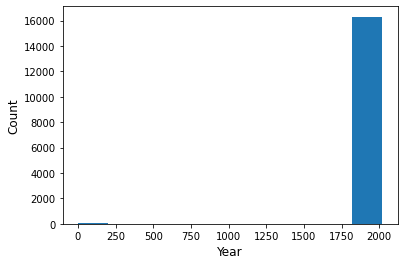

In [ ]:
# year 정제
plt.hist(df['Year'])
plt.xlabel('Year',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.show()

In [ ]:
df[df['Year']<250]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Company
74,3D Baseball,PS,96.0,Sports,BMG Interactive Entertainment,0.02,0.01,0.00,0.00,0.03,Sony
192,Ace Combat: Assault Horizon Legacy,3DS,11.0,Simulation,Namco Bandai Games,0.10,0.06,0.08,0.01,0.25,Nintendo
216,Adventure Island,NES,86.0,Platform,Hudson Soft,0.00,0.00,1.05,0.00,1.05,Nintendo
242,AeroFighters Assault,N64,97.0,Action,Video System,0.15,0.04,0.00,0.00,0.19,Nintendo
259,Age of Empires III: Complete Collection,PC,9.0,Strategy,Microsoft Game Studios,0.01,0.12,0.00,0.03,0.16,PC
...,...,...,...,...,...,...,...,...,...,...,...
15379,Virtua Cop,SAT,95.0,Shooter,Sega,0.00,0.00,0.62,0.00,0.62,Sega
15688,We Sing Pop!,Wii,12.0,Misc,Nordic Games,0.08,0.19,0.00,0.03,0.30,Nintendo
15779,Winning Eleven: Pro Evolution Soccer 2007,PC,6.0,Sports,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,PC
15866,Wolfenstein,PC,9.0,Shooter,Activision,0.01,0.03,0.00,0.01,0.05,PC


In [ ]:
error_year_index = list(df[df['Year']<250].index)

for i in error_year_index:
  if df.loc[i,'Year'] < 50:
    df.loc[i,'Year'] += 2000
  else:
    df.loc[i,'Year'] += 1900

df['Year'] = df['Year'].astype(int)

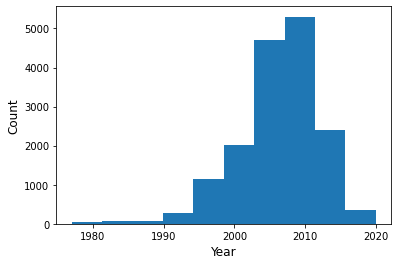

In [ ]:
plt.hist(df['Year'])
plt.xlabel('Year',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.show()

In [ ]:
df[df['Total_Sales'] >= 80]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Company
15750,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Nintendo


In [ ]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
count,16403.000000,16403.000000,16403.000000,16403.000000,16403.000000,16403.000000
mean,2006.408218,0.266459,0.147943,0.078369,0.048491,0.541261
std,5.828550,0.821194,0.508167,0.310923,0.189605,1.563752
min,1977.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
df = df.sort_values('Year').reset_index(drop=True)
df.to_csv('df_clean.csv', index=False)

# Part 3. Analytics & Visualization

In [ ]:
# 저장했던 데이터 업로드
df = pd.read_csv('df_clean.csv')
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Company
0,Combat,2600,1977,Action,Atari,1.17,0.07,0.0,0.01,1.25,Atari
1,Bridge,2600,1980,Misc,Activision,0.25,0.02,0.0,0.00,0.27,Atari
2,Ice Hockey,2600,1980,Sports,Activision,0.46,0.03,0.0,0.01,0.50,Atari
3,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.0,0.03,2.76,Atari
4,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.0,0.01,1.15,Atari


## **1. 지역에 따라서 선호하는 게임 장르가 다를까?**

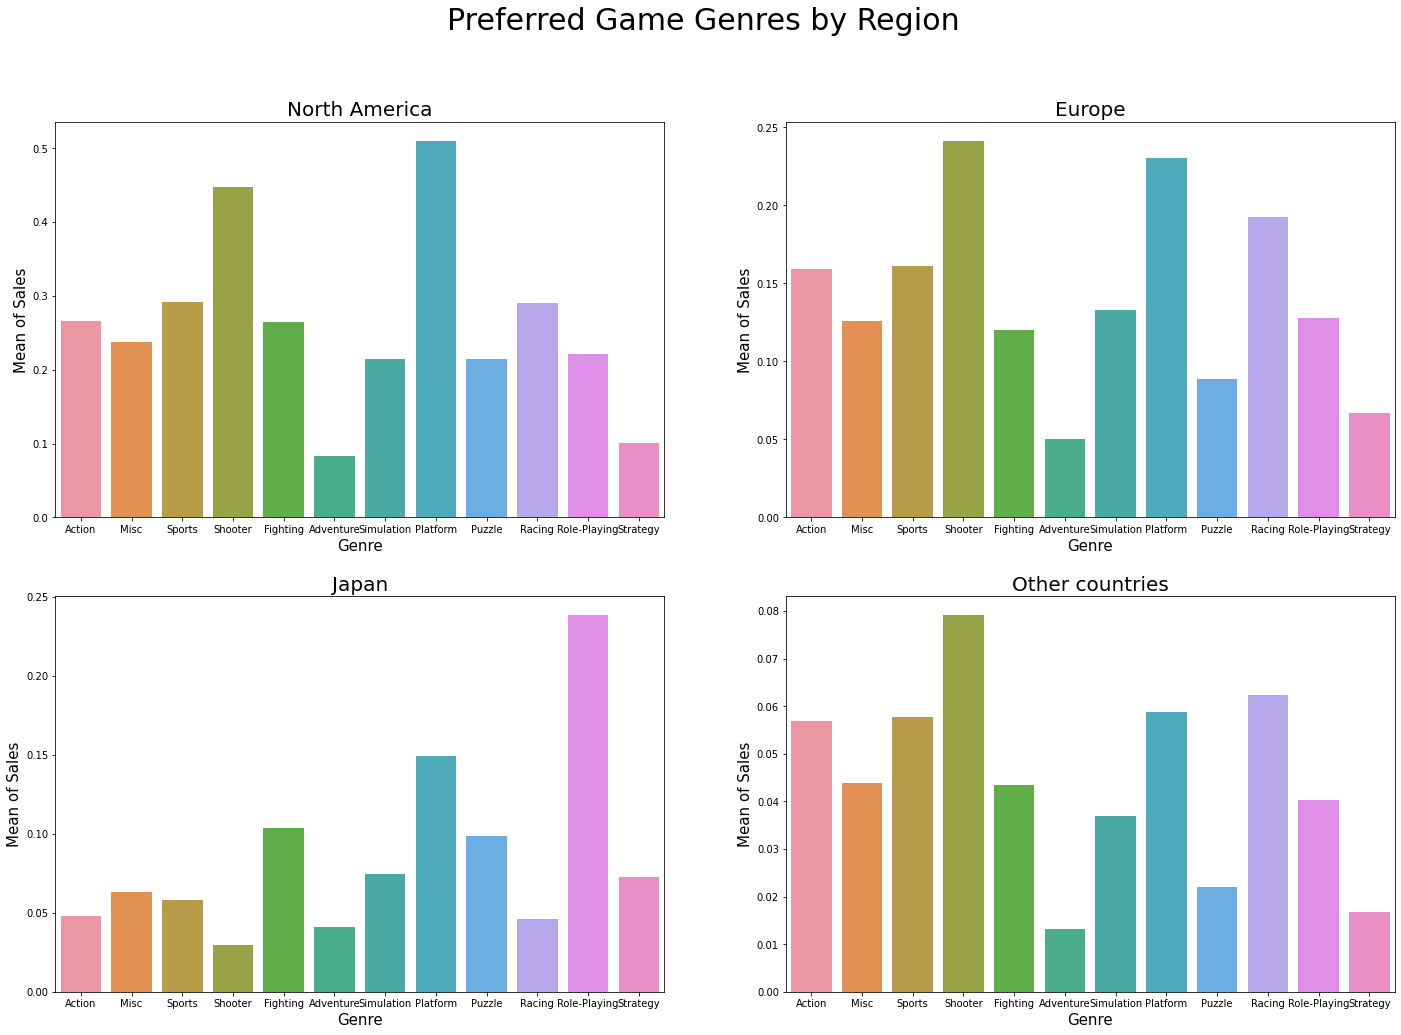

In [ ]:
fig, axes = plt.subplots(2, 2, figsize= (24,16))

sns.barplot(data = df, x = 'Genre', y = 'NA_Sales', ci = None, ax = axes[0,0])
axes[0,0].set_title("North America", fontsize=20)
axes[0,0].set_xlabel('Genre', fontsize=15)
axes[0,0].set_ylabel('Mean of Sales', fontsize=15)

sns.barplot(data = df, x = 'Genre', y = 'EU_Sales', ci = None, ax = axes[0,1])
axes[0,1].set_title("Europe", fontsize=20)
axes[0,1].set_xlabel('Genre', fontsize=15)
axes[0,1].set_ylabel('Mean of Sales', fontsize=15)

sns.barplot(data = df, x = 'Genre', y = 'JP_Sales', ci = None, ax = axes[1,0])
axes[1,0].set_title("Japan", fontsize=20)
axes[1,0].set_xlabel('Genre', fontsize=15)
axes[1,0].set_ylabel('Mean of Sales', fontsize=15)

sns.barplot(data = df, x = 'Genre', y = 'Other_Sales', ci = None, ax = axes[1,1])
axes[1,1].set_title("Other countries", fontsize=20)
axes[1,1].set_xlabel('Genre', fontsize=15)
axes[1,1].set_ylabel('Mean of Sales', fontsize=15)

plt.suptitle("Preferred Game Genres by Region", fontsize=30)
plt.show()

In [ ]:
df.groupby('Genre')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].mean().corr()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
NA_Sales,1.000000,0.942303,0.098210,0.847513
EU_Sales,0.942303,1.000000,-0.024401,0.950029
JP_Sales,0.098210,-0.024401,1.000000,-0.129463
Other_Sales,0.847513,0.950029,-0.129463,1.000000


In [ ]:
genre_sales = df.groupby('Genre')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
genre_sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,873.93,523.82,158.58,187.02
Adventure,105.15,63.96,51.92,16.78
Fighting,223.00,101.20,87.15,36.65
Misc,403.88,213.82,107.69,74.59
Platform,446.15,201.43,130.53,51.50
Puzzle,122.17,50.52,56.24,12.49
Racing,357.73,237.15,56.62,76.96
Role-Playing,326.51,187.63,350.78,59.44
Shooter,580.71,312.89,38.20,102.59


* 가설 검정<br>
$H_0$: 두 변수는 독립이다. 지역과 선호 게임 장르는 관련이 없다.<br>
$H_1$: 두 변수는 독립이 아니다. 지역과 선호 게임 장르는 관련이 있다.<br>
독립성 검정을 사용하여 4개 지역 간 게임 장르별 총 매출액의 차이를 비교

In [ ]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency([genre_sales['NA_Sales'], genre_sales['EU_Sales'], genre_sales['JP_Sales'], genre_sales['Other_Sales']])

msg = 'Test Statistic: {}\np-value: {}\nDegree of Freedom: {}'
print(msg.format(chi2, p, dof))

Test Statistic: 695.8247706242724
p-value: 3.9895056804775155e-125
Degree of Freedom: 33


p값이 유의 수준(0.05)보다 작으므로 귀무가설을 기각하고 지역과 선호 게임 장르는 서로 관련이 있다고 결론을 내릴 수 있다.

## **2. 연도별 게임의 트렌드가 있을까?**

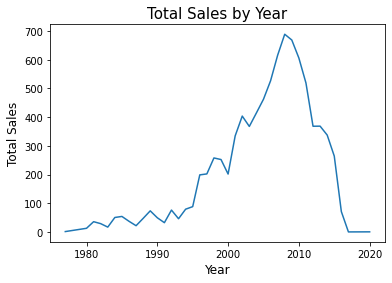

In [ ]:
## 1. 총 판매량
sales_by_year = df.groupby('Year')['Total_Sales'].sum()

plt.plot(sales_by_year)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.title('Total Sales by Year', fontsize=15)
plt.show()

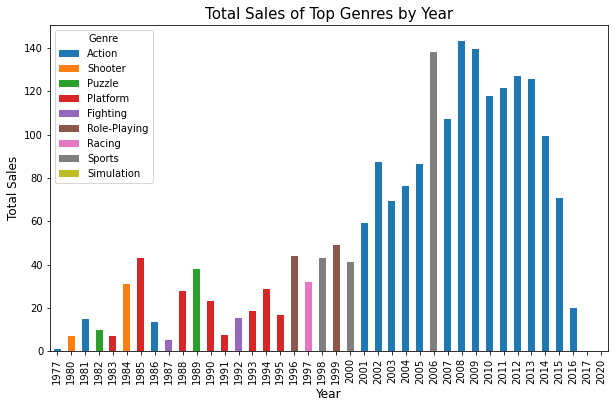

In [ ]:
## 2. 장르별 총 판매량
sales_by_year_genre = df.groupby(['Year', 'Genre'])['Total_Sales'].sum()

top_genres = sales_by_year_genre.groupby('Year').idxmax()
top_sales = sales_by_year_genre.loc[top_genres]

top_sales.unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Total Sales of Top Genres by Year", fontsize=15)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.show()

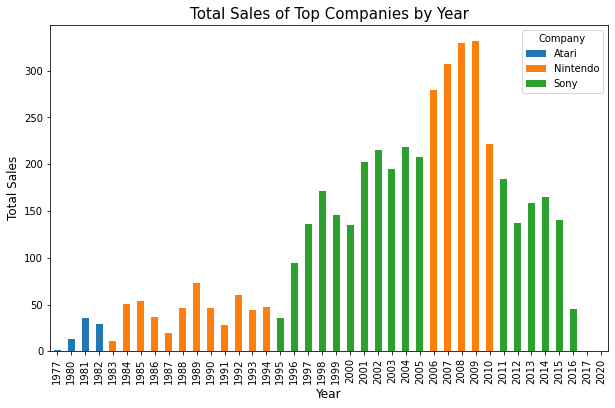

In [ ]:
## 3. 회사별 총 판매량
sales_by_year_company = df.groupby(['Year', 'Company'])['Total_Sales'].sum()

top_com = sales_by_year_company.groupby('Year').idxmax()
top_sales = sales_by_year_company.loc[top_com]

top_sales.unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Total Sales of Top Companies by Year", fontsize=15)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.show()

위 연도별 그래프들을 보면, 90년대 초반부터 2000년대 후반까지 게임의 총 판매량이 증가하다가 감소하는 것을 알 수 있다.

이러한 추세는 모바일 게임의 등장, 소비자 선호도의 변화, 무료 게임의 부상 등 다양한 요인에 기인할 수 있다.

## **3. 인기가 많은 게임?**

### 1. Total Sales로 판단

In [ ]:
# 100만 기준
M_game = df[ df['Total_Sales'] >= 1]
M_game

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Company
0,Combat,2600,1977,Action,Atari,1.17,0.07,0.00,0.01,1.25,Atari
3,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.00,0.03,2.76,Atari
4,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.00,0.01,1.15,Atari
5,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,0.05,4.31,Atari
8,Defender,2600,1980,Misc,Atari,0.99,0.05,0.00,0.01,1.05,Atari
...,...,...,...,...,...,...,...,...,...,...,...
16309,No Man's Sky,PS4,2016,Action,Hello Games,0.58,0.74,0.02,0.26,1.60,Sony
16339,FIFA 17,PS4,2016,Sports,Electronic Arts,0.28,3.75,0.06,0.69,4.78,Sony
16342,Far Cry: Primal,PS4,2016,Action,Ubisoft,0.59,1.16,0.06,0.33,2.14,Sony
16348,FIFA 17,XOne,2016,Sports,Electronic Arts,0.17,1.26,0.00,0.10,1.53,Microsoft


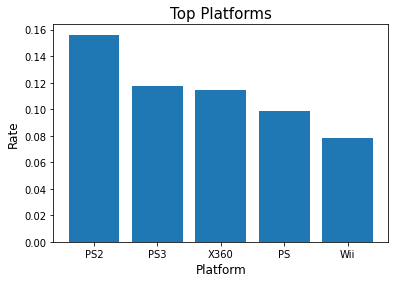

In [ ]:
# 인기 게임의 플랫폼
top_platforms = M_game['Platform'].value_counts(normalize=True).head(5)

plt.bar(top_platforms.index, top_platforms.values)
plt.title('Top Platforms', fontsize=15)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Rate', fontsize=12)
plt.show()

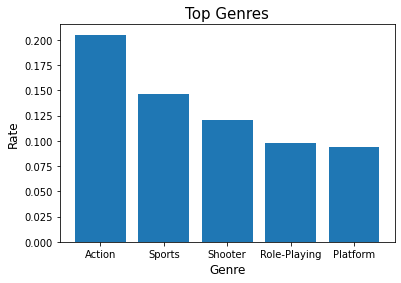

In [ ]:
# 인기 게임의 장르
top_genres = M_game['Genre'].value_counts(normalize=True).head(5)

plt.bar(top_genres.index, top_genres.values)
plt.title('Top Genres', fontsize=15)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Rate', fontsize=12)
plt.show()

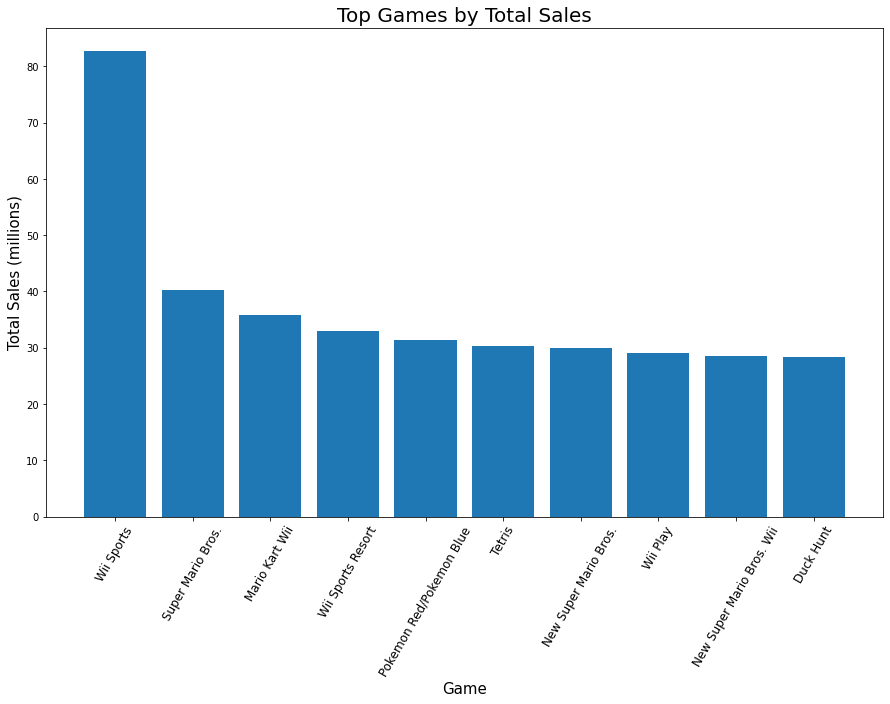

In [ ]:
# 총 판매량 상위 10개의 게임들
top_games = M_game.sort_values(by='Total_Sales', ascending=False).head(10)

plt.figure(figsize = (15,9))
plt.bar(top_games['Name'], top_games['Total_Sales'])
plt.xticks(rotation=60, fontsize = 12)
plt.title('Top Games by Total Sales', fontsize=20)
plt.xlabel('Game', fontsize=15)
plt.ylabel('Total Sales (millions)', fontsize=15)
plt.show()

### 2. Clustering으로 판단

In [ ]:
# 같은 게임 합쳐주기
each_name = df.groupby(['Name']).agg({'Genre': 'first',
                                      'Publisher':'first',
                                      'NA_Sales': 'sum',
                                      'EU_Sales': 'sum',
                                      'JP_Sales': 'sum',
                                      'Other_Sales': 'sum',
                                      'Company': 'first'}).reset_index()

In [ ]:
df[df['Name'] == '007: Quantum of Solace']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Company
9726,007: Quantum of Solace,X360,2008,Action,Activision,0.82,0.52,0.01,0.14,1.49,Microsoft
9730,007: Quantum of Solace,Wii,2008,Action,Activision,0.30,0.29,0.01,0.07,0.67,Nintendo
9732,007: Quantum of Solace,PS3,2008,Action,Activision,0.43,0.52,0.02,0.20,1.17,Sony
9740,007: Quantum of Solace,PS2,2008,Action,Activision,0.17,0.00,0.00,0.26,0.43,Sony
9779,007: Quantum of Solace,PC,2008,Action,Activision,0.01,0.01,0.00,0.00,0.02,PC
9786,007: Quantum of Solace,DS,2008,Action,Activision,0.11,0.01,0.00,0.01,0.13,Nintendo


In [ ]:
each_name[each_name['Name'] == '007: Quantum of Solace']

,Name,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Company
12,007: Quantum of Solace,Action,Activision,1.84,1.35,0.04,0.68,Microsoft


In [ ]:
from sklearn.decomposition import PCA

# Sales 열들만을 합친 데이터 sales
sales = each_name[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

# PCA 수행
pca = PCA()
pca.fit(sales)
pca.transform(sales)

pca.explained_variance_ratio_

array([0.85147463, 0.08240148, 0.05627926, 0.00984463])

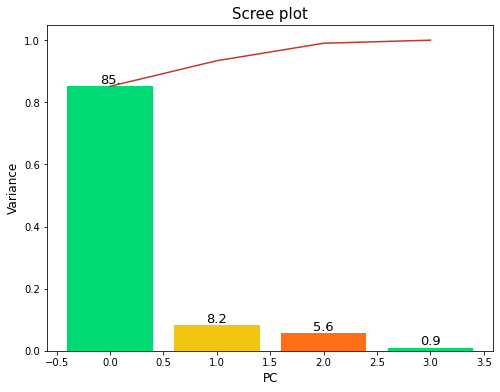

In [ ]:
# scree plot으로 나타내는 함수 정의 
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    
    ax = plt.subplot()
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals, color = ['#00da75', '#f1c40f',  '#ff6f15']) # Bar plot
    ax.plot(ind, cumvals, color = '#c0392b') # Line plot 
    
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va = "bottom", ha = "center", fontsize = 13)

plt.figure(figsize=(8,6))  
plt.xlabel("PC", fontsize=12)
plt.ylabel("Variance", fontsize=12)
plt.title('Scree plot', fontsize=15)
scree_plot(pca)

In [ ]:
pca = PCA(1)
B = pca.fit_transform(sales)
pc = pd.DataFrame(B,columns=['PC1'])
pc.head()

,PC1
0,-0.262081
1,-0.436880
2,-0.315801
3,-0.438128
4,-0.436880


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

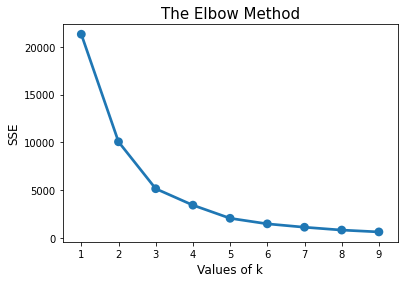

In [ ]:
# elbow method 결과 시각화
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

sse = {}

for k in range(1,10):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(pc)
  sse[k] = kmeans.inertia_

plt.title('The Elbow Method', fontsize=15)
plt.xlabel('Values of k', fontsize=12)
plt.ylabel('SSE', fontsize=12)
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(pc)

cluster_labels = kmeans.labels_

each_name = each_name.assign(cluster = cluster_labels)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
each_name.groupby(['cluster']).mean()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
cluster,,,,
0,0.209612,0.108792,0.087686,0.035478
1,3.246802,1.961579,0.500789,0.644534
2,14.898529,8.370294,2.722647,2.777353


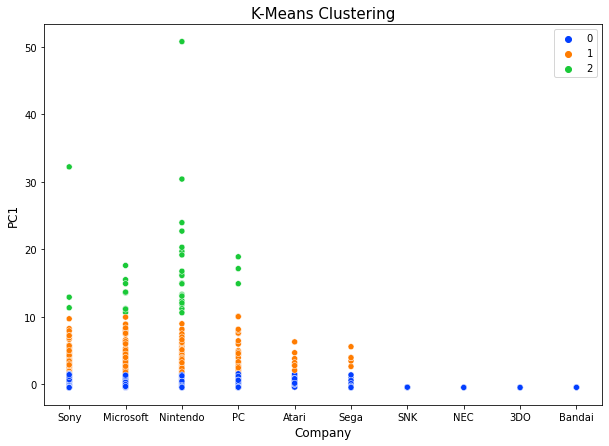

In [ ]:
plt.figure(figsize=(10, 7))

sns.scatterplot(x = each_name['Company'], y = pc['PC1'], hue = cluster_labels, palette = 'bright')
plt.title('K-Means Clustering', fontsize=15)
plt.xlabel('Company', fontsize=12)
plt.ylabel('PC1', fontsize=12)
plt.show()

In [ ]:
each_name[each_name['cluster'] == 2]['Name'].reset_index()

,index,Name
0,1197,Call of Duty 4: Modern Warfare
1,1199,Call of Duty: Advanced Warfare
2,1200,Call of Duty: Black Ops
3,1201,Call of Duty: Black Ops 3
4,1202,Call of Duty: Black Ops II
5,1204,Call of Duty: Ghosts
6,1205,Call of Duty: Modern Warfare 2
7,1206,Call of Duty: Modern Warfare 3
8,2539,Duck Hunt
9,3648,Grand Theft Auto IV


# Part 4. Business Insight & Conclusion

## Business Insight

1. **연도별 총 매출 트렌드**

비디오 게임 산업은 1990년대 후반부터 2000년대 중반까지 크게 성장했으며, 2008년경에 최고 매출을 기록했습니다. 이후 매출은 감소했지만 여전히 수십억 달러 규모의 시장입니다.
2. **인기 있는 장르**

가장 인기 있는 게임 장르는 액션, 스포츠, 슈팅 게임입니다. 이들 장르는 전체 매출에서 꾸준히 상위권을 차지하고 있습니다.
3. **시장 점유율 높은 회사**

닌텐도와 소니는 비디오 게임 산업을 주도하는 회사로, 총 매출 측면에서 상당한 시장 점유율을 차지하고 있습니다.

4. **판매량이 높은 그룹에 속하는 게임들**

cluster 2가 판매량이 가장 높은 그룹에 속하는 게임들입니다. Call of Duty, Grand Theft Auto, Mario, Pokemon 등 시리즈물 게임인 것을 확인할 수 있습니다.

## Conclusion

닌텐도 또는 소니처럼 규모가 큰 회사임을 가정한다면 새로운 `액션, 스포츠, 슈팅` 장르의 게임을 디자인하는 것도 괜찮겠지만, 시리즈물 게임의 보통 발매 주기인 1-2년 후를 다음 분기로 잡고 다음 시리즈의 게임을 디자인하는 것도 좋은 선택이 될 수 있을 것 같습니다.